<a href="https://colab.research.google.com/github/jvataidee/MachineLearning/blob/master/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_6ecb6c85550043f090237e5943d2647c~mv2.png/v1/fill/w_417,h_88,al_c,q_85,usm_0.66_1.00_0.01/Ativo%2023-8.webp" height="75px"></p>

**by: [João Ataíde](https://www.joaoataide.com)**
#**Predição de Evasão de Clientes em Empresas de Telecomunicações**


---

<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_a558eaed78994bcb94f2c0e83f5722ff~mv2.jpg"></p>


Empresas prestadoras de serviços comunicação costumam usar análises de insatisfação de cliente, identificando sempre se seus clientes estão confirmados ou não, essas análises são umas das principais métricas para manter e adquirir novos compradores. Em geral, as empresas desses setores costumam ter agências de atendimento ao cliente, onde uma das suas principais tarefas é tentar reconquistar aqueles clientes perdidos, os quais podem custar muito mais do que clientes novos.

Devido a isso, as empresas investem em nova tecnologias para fazer essas análises, estas comummente utilizam-se do *Churn rate*, ou simplesmente *Churn*, que é uma das formas de medir essa taxa de evasão dos clientes, 
Além de identificar essa taxa de evasão, o *Churn* auxiliar a identificar futuros cancelamento, realizando uma predição que auxilia na tomada de decisão e promoção de ações diferenciadas para estes clientes. Uma aplicação cotidiana nossa são nas empresas de streaming como Spotifly e Netflix. 

Por ser uma métrica tão importante, o Carlos Melos no seu curso Data Science na prática nos passou um desafio, implementar do zero uma solução de Churn para uma empresa de telecomunicação, utilizando-se de dados reais.


## Aquisição dos Dados e importação das bibliotecas



Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), tratam-se de um típico problema das companhias de telecomunicações.  Você pode ver o *dataset* completo [neste link](https://raw.githubusercontent.com/jvataidee/MachineLearning/master/dados/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Mesmo não havendo informações explícitas disponibilizadas pela IBM, os nomes das colunas permitem um entendimento a respeito do problema.

**Falar sobre os dados**

In [1]:
#importar bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Bibliotecas de modelagem


# configurar a visualização
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# importar os dados
df = "https://raw.githubusercontent.com/jvataidee/MachineLearning/master/dados/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(df)

# ver as 5 primeiras entradas

print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


A visualização dessas 5 primeiras entradas permite a notar a composição do nosso *dataset*, mesmo que este não apresente uma definição oficial de cada coluna. O *dataset* apresenta 7042 entradas com 21 colunas.

## Análise Exploratória 
 

Como forma de avalisar a qualidade do *dataset*, comecei pela análise dos dados ausentes, este que indica se poderemos dá continuidade ao projeto ou não




In [3]:
#Porcentagem de dados ausentes
df.isnull().sum()/df.shape[0]*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

Após o calculo podemos ver que esse *dataset* já está limpo, nçao apresentando nenhum dados ausente. O proximo passo ´re calcular dentre essas culunas quais apresentam valores únicos.

In [4]:
#Calcular valores únicos
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

O cálculo dos valores únicos indicaram que, a coluna  `customerID`apresenta um valor unico para cada cliente, `Churn`indica a situação de cada cliente. Proximo passo irei verifiar qual a situação dos dados em relação ao tipo.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Veja que a camada  ` TotalCharges`está apresentando um tipo object (*String*), desta forma irei converter para *Float*, pois se trata de um valor não inteiro.

In [6]:
#Converter para float
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors='coerce')

Agora, irei realizar uma copia do *dataset*, descartar a coluna ` customerID ` e então da inicio a estatistica descritiva.

In [7]:
#Conpiar dados
df_new = df.copy()

df_new = df_new.drop(['customerID'], axis = 1)

In [8]:
df_new.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


A estatistica descritiva, não apresentou nenhum indicio de presença de outlier, sendo então necessário plotar o boxplot das camadas `TotalCharges`e `MonthlyCharges`.


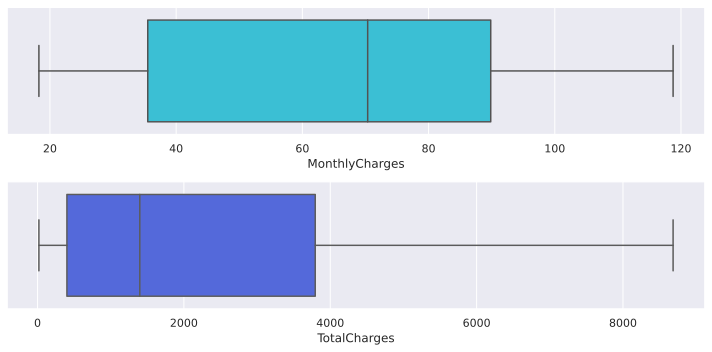

In [9]:
#Plotar os bocplots

fig, ax =  plt.subplots(nrows = 2, ncols = 1, figsize =(10,5))

sns.boxplot(df_new.MonthlyCharges, ax= ax[0], color = '#22d1ee')
sns.boxplot(df_new.TotalCharges, ax= ax[1], color = '#3d5af1')

plt.tight_layout()
plt.show()

Mesmo com o boxplot não foi possível ideintificar  a presença de *outlier*. Dando continuiadade a análise exploratória, vou verificar a camada `Tenure`, tal variável representa o tempo que cada cliente utilizou o serviço, podendo mostra a "fidelidade de serviço".

Assumindo que a unidade de tempos da camada `Tenure`é em meses.



In [10]:
#Criar dataset tenure e ordenas
df_tenure = df_new.tenure.value_counts()
df_tenure = df_tenure.sort_index()

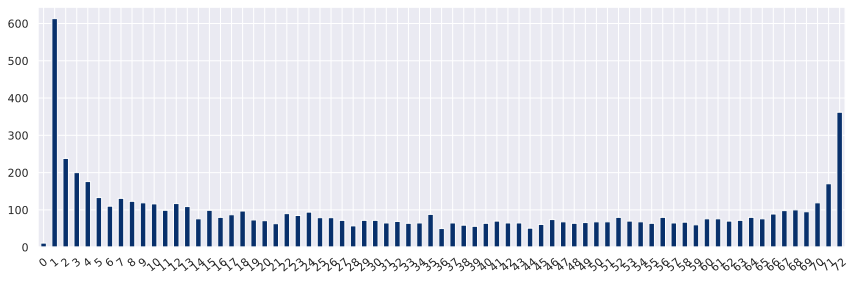

In [11]:
#Plotar tempo de serviço utilizado
df_tenure.plot(kind = 'bar', figsize = (12,4), cmap = "Blues_r")

plt.xticks(rotation = 40)

plt.tight_layout()
plt.show()

Note que, o tempo de serviço utilizado apresenta uma queda do primeiro més para os demais, com uma sumida nos ultimos meses de 70 a 72.

Agora analisando a existencia de vieses (Bias) no nosso *dataset*, vou verificar algumas relações de contagem, `gender` o genero, `Churn` a taxa de rotatividade, `Partner` a existencia de parceiros e os serviços utilizados.

In [68]:
#Contando por generos
df_gender = df_new.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64
Male      50.47565
Female    49.52435
Name: gender, dtype: float64



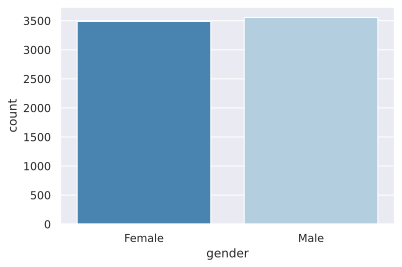

In [85]:
#Balanceamento de generos no dataset
print(df_gender)
print(df_gender/df_new.shape[0]*100)
print()

sns.countplot(df_new.gender,palette = 'Blues_r');

Analisando o gráfico acima podemos ver que os dados de generos estão balanceados, possuindo pouca diferença entre eles.

In [78]:
#Contando por churn
df_taxa = df_new.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64
No     73.463013
Yes    26.536987
Name: Churn, dtype: float64



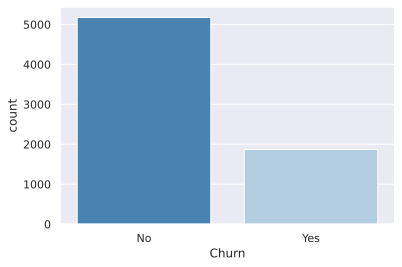

In [84]:
#Balanceamento do churn
print(df_taxa)
print(df_taxa/df_new.shape[0]*100)
print()

sns.countplot(df_new.Churn,palette = 'Blues_r');

Analisando o balanceamento das taxas, pode-se ver que estes não estão balanceados. Tendo então 73,5% para não e 26,5% para sim. Desta forma, será necessário o procedimento de balancemanto, na proximo etapa.

In [86]:
#analisando as parcerias
df_parcer = df_new.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64
No     51.69672
Yes    48.30328
Name: Partner, dtype: float64



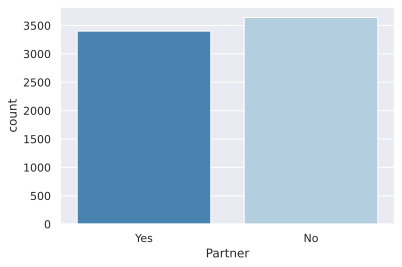

In [104]:
print(df_parcer)
print(df_parcer/df_new.shape[0]*100)
print()

sns.countplot(df_new.Partner,palette = 'Blues_r');

Analisando os dados de parcerias, esses apresentaram-se balanceados. Tendo em visto essas analisas feitas anteriormente, posso então identificar os tipos de serviços oferecidos.

In [96]:
#Separando dataset  de serviços
df_service = df_new.iloc[:,5:14]

In [100]:
#Mostrar os tipos de serviço
print(np.unique(df_service.select_dtypes('object').values))

['DSL' 'Fiber optic' 'No' 'No internet service' 'No phone service' 'Yes']


Como estamos lindando com um problema de cariáveis categórica, é se insuma importancia analisar os valores únicos, tal análise permite identificar as situações das camadas diferente apresentarem a mesma coisa.

Para a análise dos serviços, podemos utilizar esses valroes únicos apresentados acima como sendo a mesma coisa. Apesar desta hipotese ser completamente válida, para o trabalho aqui em questão irei utilizalos como variáveis únicas.


###Analisar Correlação



In [111]:
#Criando uma mascara da diagonal superior
mask = np.zeros_like(df_new.corr())
mask[np.triu_indices_from(mask)] = True

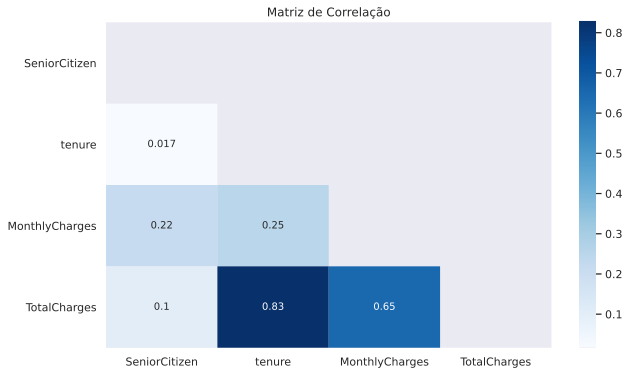

In [113]:
#Plotar matriz de correlação
plt.figure(figsize = (10,6))
plt.title("Matriz de Correlação")

sns.heatmap(df_new.corr(), mask= mask, cmap = 'Blues', annot=True )
plt.show()

###Preparação dos dados

##Soluções já existentes

##Construção do modelo

###Métrica de peformace

##Qual melhor modelo?

###Preparação dos dados

####Cross Validation

##Conclusão